# Sanjay Regi Philip ADS 509 Assignment 2.1

# Tokenization, Normalization, Descriptive Statistics 

This notebook holds Assignment 2.1 for Module 2 in ADS 509, Applied Text Mining. Work through this notebook, writing code and answering questions where required. 

In the previous assignment you put together Twitter data and lyrics data on two artists. In this assignment we explore some of the textual features of those data sets. If, for some reason, you did not complete that previous assignment, data to use for this assignment can be found in the assignment materials section of Blackboard. 

This assignment asks you to write a short function to calculate some descriptive statistics on a piece of text. Then you are asked to find some interesting and unique statistics on your corpora. 


### Note to instructor: the data files used for this assignment (twitter followers and lyrics) were subsampled because of performance issues. I attempted to use 200,000+ twitter followers but data cleaning was not finished after 6 hours so I had to use a smaller subsample to complete the assignment.

## Import Packages and Find File Path

In [1]:
import os
import re
import emoji
import pandas as pd
import numpy as np

from collections import Counter, defaultdict
from nltk.corpus import stopwords
from string import punctuation

sw = stopwords.words("english")

In [2]:
# Add any additional import statements you need here
import string

In [3]:
# change `data_location` to the location of the folder on your machine.
data_location = "/Users/sanjayregiphilip/OneDrive/DS/ADS 509/Module2/SRegiPhilip-ADS509-Module2/M1 Results"

# These subfolders should still work if you correctly stored the 
# data from the Module 1 assignment
twitter_folder = "twitter/"
lyrics_folder = "lyrics/"

### Define Descriptive Stats Function

In [4]:
def descriptive_stats(tokens, num_tokens = 5, verbose=True) :
    """
        Given a list of tokens, print number of tokens, number of unique tokens, 
        number of characters, lexical diversity (https://en.wikipedia.org/wiki/Lexical_diversity), 
        and num_tokens most common tokens. Return a list with the number of tokens, number
        of unique tokens, lexical diversity, and number of characters. 
    
    """
    
    counter = Counter(tokens)
    characters = ''.join(tokens)
    
    # Fill in the correct values here. 
    num_tokens = sum(counter.values())
    num_unique_tokens = len(counter.keys())
    lexical_diversity = num_unique_tokens/num_tokens
    num_characters = len(characters)
    
    if verbose :        
        print(f"There are {num_tokens} tokens in the data.")
        print(f"There are {num_unique_tokens} unique tokens in the data.")
        print(f"There are {num_characters} characters in the data.")
        print(f"The lexical diversity is {lexical_diversity:.3f} in the data.")
    
        # print the five most common tokens
        print(counter.most_common(5))
        
    return([num_tokens, num_unique_tokens,
            lexical_diversity,
            num_characters])
    

In [5]:
text = """here is some example text with other example text here in this text""".split()
assert(descriptive_stats(text, verbose=True)[0] == 13)
assert(descriptive_stats(text, verbose=False)[1] == 9)
assert(abs(descriptive_stats(text, verbose=False)[2] - 0.69) < 0.02)
assert(descriptive_stats(text, verbose=False)[3] == 55)

There are 13 tokens in the data.
There are 9 unique tokens in the data.
There are 55 characters in the data.
The lexical diversity is 0.692 in the data.
[('text', 3), ('here', 2), ('example', 2), ('is', 1), ('some', 1)]


Q: Why is it beneficial to use assertion statements in your code? 

A: Assertion code is useful for debugging and allow to ensure that the values being used are indeed what is expected and suitable for the code that it is being executed on.

## Data Input

Now read in each of the corpora. For the lyrics data, it may be convenient to store the entire contents of the file to make it easier to inspect the titles individually, as you'll do in the last part of the assignment. In the solution, I stored the lyrics data in a dictionary with two dimensions of keys: artist and song. The value was the file contents. A data frame would work equally well. 

For the Twitter data, we only need the description field for this assignment. Feel free all the descriptions read it into a data structure. In the solution, I stored the descriptions as a dictionary of lists, with the key being the artist. 




### Read Lyrics Data

In [6]:
# Read in the lyrics data
import os

## Function to remove artist leading name prefix for song file names
def remove_filename_prefix(text, prefix):
    if text.startswith(prefix):
        return text[len(prefix):]
    return text

## Function to read in lyrics from artist directory
def read_lyrics(path, prefix, artist_name):
    lyrics_dict = defaultdict(dict)
    
    for filename in os.listdir(path):
        name, file_extension = os.path.splitext(filename)
        song_name = remove_filename_prefix(name, prefix)
        
        file = open(path+filename,"r", encoding='unicode_escape')
        content = file.read()
        file.close()
        
        ## save results to dictionary
        lyrics_dict[artist_name][song_name] = content
        
        
    return lyrics_dict


# Read in lyrics for Cher
path_cher = "/Users/sanjayregiphilip/OneDrive/DS/ADS 509/Module2/SRegiPhilip-ADS509-Module2/M1 Results/lyrics/cher/"
prefix_cher = "cher_"
artist_name_cher = "Cher"

cher_lyrics = read_lyrics(path_cher, prefix_cher, artist_name_cher)
cher_songs_complete = cher_lyrics



# Read in lyrics for Robyn
path_robyn = "/Users/sanjayregiphilip/OneDrive/DS/ADS 509/Module2/SRegiPhilip-ADS509-Module2/M1 Results/lyrics/robyn/"
prefix_robyn = "robyn_"
artist_name_robyn = "Robyn"

robyn_lyrics = read_lyrics(path_robyn, prefix_robyn, artist_name_robyn)
robyn_songs_complete = robyn_lyrics


# Combine Dictionary for both artists' lyrics
lyrics_dict = {"Cher": cher_lyrics,
               "Robyn": robyn_lyrics}

### Read Twitter Data

In [7]:
# Read in the twitter data

## Function to read in all twitter follower data in directory
def read_twitter(path, artist_name):
    twitter_df = pd.read_csv(path, sep="\t", error_bad_lines=False)
    return twitter_df

# Read in Cher Follower Data
path_cher = "/Users/sanjayregiphilip/OneDrive/DS/ADS 509/Module2/SRegiPhilip-ADS509-Module2/M1 Results/twitter/cher_followers_data.txt"

cher_twitter_df = read_twitter(path_cher, artist_name_cher)
cher_twitter_df = cher_twitter_df.sample(frac=0.05, random_state=1) ## added because of performance issues

# Read in Robyn Follower Data
path_robyn = "/Users/sanjayregiphilip/OneDrive/DS/ADS 509/Module2/SRegiPhilip-ADS509-Module2/M1 Results/twitter/robynkonichiwa_followers_data.txt"

robyn_twitter_df = read_twitter(path_robyn, artist_name_robyn)
robyn_twitter_df = robyn_twitter_df.sample(frac=0.05, random_state=1) ## added because of performance issues

# Create Dictionary for Artist follower description as string in list
twitter_dict = {"Cher": (cher_twitter_df.description.astype(str).values.tolist()),
               "Robyn": (robyn_twitter_df.description.astype(str).values.tolist())}

b'Skipping line 624: expected 7 fields, saw 12\nSkipping line 17506: expected 7 fields, saw 12\nSkipping line 104621: expected 7 fields, saw 12\n'
b'Skipping line 188924: expected 7 fields, saw 12\n'
b'Skipping line 301600: expected 7 fields, saw 12\n'
b'Skipping line 429936: expected 7 fields, saw 12\nSkipping line 444405: expected 7 fields, saw 12\n'
b'Skipping line 677792: expected 7 fields, saw 12\nSkipping line 773482: expected 7 fields, saw 12\n'
b'Skipping line 818258: expected 7 fields, saw 12\nSkipping line 895225: expected 7 fields, saw 12\n'
b'Skipping line 955213: expected 7 fields, saw 10\nSkipping line 994827: expected 7 fields, saw 12\n'
b'Skipping line 1246039: expected 7 fields, saw 12\n'
b'Skipping line 1569117: expected 7 fields, saw 12\n'
b'Skipping line 2127250: expected 7 fields, saw 12\n'
b'Skipping line 2335031: expected 7 fields, saw 12\n'
b'Skipping line 2681065: expected 7 fields, saw 10\n'
b'Skipping line 3147696: expected 7 fields, saw 12\n'


In [8]:
cher_twitter_df.shape ## confirm how many followers descriptions are being used due to sampling for performance

(19582, 7)

## Data Cleaning

Now clean and tokenize your data. Remove punctuation chacters (available in the `punctuation` object in the `string` library), split on whitespace, fold to lowercase, and remove stopwords. Store your cleaned data, which must be accessible as an interable for `descriptive_stats`, in new objects or in new columns in your data frame. 



In [9]:
punctuation = set(punctuation) # speeds up comparison

In [10]:
# retrieve follower data for each artist
twitter_cher = twitter_dict['Cher']
twitter_robyn = twitter_dict['Robyn']

In [11]:
# fold to lowercase
for index, item in enumerate(twitter_cher):
    twitter_cher[index] = item.casefold()
    
for index, item in enumerate(twitter_robyn):
    twitter_robyn[index] = item.casefold()

In [12]:
# remove punctuation
for index, item in enumerate(twitter_cher):
    twitter_cher[index] = re.sub(r'[^\w\s]','',item)
    
for index, item in enumerate(twitter_robyn):
    twitter_robyn[index] = re.sub(r'[^\w\s]','',item)

In [13]:
# split on whitespace
for index, item in enumerate(twitter_cher):
    twitter_cher[index] = item.split()
    
for index, item in enumerate(twitter_robyn):
    twitter_robyn[index] = item.split()

In [14]:
# returns all words to single list
def flatten(l):
    return [item for sublist in l for item in sublist]

twitter_cher = flatten(twitter_cher)
twitter_robyn = flatten(twitter_robyn)

In [15]:
# remove stopwords
twitter_cher = [word for word in twitter_cher if not word in stopwords.words()]
twitter_robyn = [word for word in twitter_robyn if not word in stopwords.words()]

### Data Cleaning for Lyrics
#### Folds to lowercase, removes punctuation, splits on whitespace, removes stopwords

In [16]:
cher_lyrics = lyrics_dict['Cher']['Cher']
robyn_lyrics = lyrics_dict['Robyn']['Robyn']

In [17]:
cher_lyrics=list(cher_lyrics.values())
robyn_lyrics=list(robyn_lyrics.values())

In [18]:
# fold to lowercase
for index, item in enumerate(cher_lyrics):
    cher_lyrics[index] = item.casefold()

for index, item in enumerate(robyn_lyrics):
    robyn_lyrics[index] = item.casefold()

In [19]:
# remove punctuation
for index, item in enumerate(cher_lyrics):
    cher_lyrics[index] = re.sub(r'[^\w\s]','',item)
    
for index, item in enumerate(robyn_lyrics):
    robyn_lyrics[index] = re.sub(r'[^\w\s]','',item)

In [20]:
# split on whitespace
for index, item in enumerate(cher_lyrics):
    cher_lyrics[index] = item.split()
    
for index, item in enumerate(robyn_lyrics):
    robyn_lyrics[index] = item.split()

In [21]:
# returns all words to single list
def flatten(l):
    return [item for sublist in l for item in sublist]

lyrics_cher = flatten(cher_lyrics)
lyrics_robyn = flatten(robyn_lyrics)

In [22]:
# remove stopwords
lyrics_cher = [word for word in lyrics_cher if not word in stopwords.words()]
lyrics_robyn = [word for word in lyrics_robyn if not word in stopwords.words()]

## Basic Descriptive Statistics

Call your `descriptive_stats` function on both your lyrics data and your twitter data and for both artists (four total calls). 

In [23]:
print("Descriptive Stats for Cher's Followers")
descriptive_stats(twitter_cher)

Descriptive Stats for Cher's Followers
There are 79153 tokens in the data.
There are 25437 unique tokens in the data.
There are 478071 characters in the data.
The lexical diversity is 0.321 in the data.
[('nan', 9810), ('love', 1191), ('life', 703), ('music', 487), ('follow', 328)]


[79153, 25437, 0.32136495142319305, 478071]

In [24]:
print("Descriptive Stats for Cher's Lyrics")
descriptive_stats(twitter_robyn)

Descriptive Stats for Cher's Lyrics
There are 6608 tokens in the data.
There are 3924 unique tokens in the data.
There are 41707 characters in the data.
The lexical diversity is 0.594 in the data.
[('nan', 823), ('music', 83), ('love', 47), ('lover', 32), ('life', 29)]


[6608, 3924, 0.5938256658595642, 41707]

In [25]:
print("Descriptive Stats for Cher's Lyrics")
descriptive_stats(lyrics_cher)

Descriptive Stats for Cher's Lyrics
There are 1768 tokens in the data.
There are 602 unique tokens in the data.
There are 10001 characters in the data.
The lexical diversity is 0.340 in the data.
[('bang', 88), ('love', 60), ('baby', 37), ('heart', 33), ('youre', 32)]


[1768, 602, 0.3404977375565611, 10001]

In [26]:
print("Descriptive Stats for Robyn's Lyrics")
descriptive_stats(lyrics_robyn)

Descriptive Stats for Robyn's Lyrics
There are 2440 tokens in the data.
There are 794 unique tokens in the data.
There are 13736 characters in the data.
The lexical diversity is 0.325 in the data.
[('baby', 50), ('time', 36), ('youre', 35), ('love', 35), ('wow', 32)]


[2440, 794, 0.3254098360655738, 13736]

Q: How do you think the "top 5 words" would be different if we left stopwords in the data? 

A: Stopwords are likely to be the most common of words and would likely show in any top 5 words lists unless filtered out explicitly.

---

Q: What were your prior beliefs about the lexical diversity between the artists? Does the difference (or lack thereof) in lexical diversity between the artists conform to your prior beliefs? 

A: As both of these artists are known as "pop artists", I am not surprised by what seems to be a relatively low lexical diversity. Pop music in general is known to be repetitive.



## Specialty Statistics

The descriptive statistics we have calculated are quite generic. You will now calculate a handful of statistics tailored to these data.

1. Ten most common emojis by artist in the twitter descriptions.
1. Ten most common hashtags by artist in the twitter descriptions.
1. Five most common words in song titles by artist. 
1. For each artist, a histogram of song lengths (in terms of number of tokens) 

We can use the `emoji` library to help us identify emojis and you have been given a function to help you.


In [27]:
assert(emoji.is_emoji("❤️"))
assert(not emoji.is_emoji(":-)"))

### Emojis 😁

What are the ten most common emojis by artist in the twitter descriptions? 


In [28]:
sum(1 for token in twitter_cher if (emoji.is_emoji(token)))

0

### Hashtags

What are the ten most common hashtags by artist in the twitter descriptions? 


### Song Titles

What are the five most common words in song titles by artist? The song titles should be on the first line of the lyrics pages, so if you have kept the raw file contents around, you will not need to re-read the data.


In [ ]:
### I re-read the data to ensure no important information was lost earlier.

In [29]:
path_cher = "/Users/sanjayregiphilip/OneDrive/DS/ADS 509/Module2/SRegiPhilip-ADS509-Module2/M1 Results/lyrics/cher/"

path_robyn = "/Users/sanjayregiphilip/OneDrive/DS/ADS 509/Module2/SRegiPhilip-ADS509-Module2/M1 Results/lyrics/robyn/"

In [30]:
# Function to read first line of each song .txt file to gather name
# This was needed because we originally extracted song name from the filename rather than the first line

def read_song_names(path, artist_name):
    
    song_name = list()
    type(song_name)
    for filename in os.listdir(path):
        file = open(path+filename,"r", encoding='unicode_escape')
        song_name.append(str(file.readline()))
        file.close()
        
    return song_name

cher_song_names = read_song_names(path_cher, artist_name_cher)
robyn_song_names = read_song_names(path_robyn, artist_name_robyn)

In [31]:
# fold to lowercase
for index, item in enumerate(cher_song_names):
    cher_song_names[index] = item.casefold()

for index, item in enumerate(robyn_song_names):
    robyn_song_names[index] = item.casefold()

In [32]:
# remove punctuation
for index, item in enumerate(cher_song_names):
    cher_song_names[index] = re.sub(r'[^\w\s]','',item)
    
for index, item in enumerate(cher_song_names):
    robyn_song_names[index] = re.sub(r'[^\w\s]','',item)

In [33]:
# split on whitespace
for index, item in enumerate(cher_song_names):
    cher_song_names[index] = str(item).split()
    
for index, item in enumerate(robyn_lyrics):
    robyn_song_names[index] = str(item).split()

In [34]:
# returns all words to single list
def flatten(l):
    return [item for sublist in l for item in sublist]

cher_song_names = flatten(cher_song_names)
robyn_song_names = flatten(robyn_song_names)

In [35]:
# remove stopwords
cher_song_names = [word for word in cher_song_names if not word in stopwords.words()]
robyn_song_names = [word for word in robyn_song_names if not word in stopwords.words()]

In [36]:
print("Descriptive Stats for Cher's Song Names Words")
descriptive_stats(cher_song_names)

Descriptive Stats for Cher's Song Names Words
There are 55 tokens in the data.
There are 50 unique tokens in the data.
There are 1398 characters in the data.
The lexical diversity is 0.909 in the data.
[('body', 2), ('heart', 2), ('ÿÿÿÿÿÿ', 2), ('cher_bodytobodyhearttohearttxtilocblobÿÿÿÿÿÿcher_bornwiththehungertxtilocblobÿÿÿÿÿÿ', 2), ('bang', 2)]


[55, 50, 0.9090909090909091, 1398]

In [37]:
print("Descriptive Stats for Robyn's Song Names Words")
descriptive_stats(robyn_song_names)

Descriptive Stats for Robyn's Song Names Words
There are 7062 tokens in the data.
There are 1085 unique tokens in the data.
There are 49747 characters in the data.
The lexical diversity is 0.154 in the data.
[("'you',", 355), ("'the',", 264), ("'i',", 204), ("'and',", 166), ("'to',", 128)]


[7062, 1085, 0.15363919569527046, 49747]

### Song Lengths

For each artist, a histogram of song lengths (in terms of number of tokens). If you put the song lengths in a data frame with an artist column, matplotlib will make the plotting quite easy. An example is given to help you out. 


Since the lyrics may be stored with carriage returns or tabs, it may be useful to have a function that can collapse whitespace, using regular expressions, and be used for splitting. 

Q: What does the regular expression `'\s+'` match on? 

A: It will help find any examples where there is more than 1 whitespace character.


In [38]:
## Method not used - was originally intended to count lyric length
def count_tokens(tokens, num_tokens = 5, verbose=True) :

    counter = Counter(tokens)
    characters = ''.join(tokens)
    
    # Fill in the correct values here. 
    num_tokens = sum(counter.values())
    num_unique_tokens = len(counter.keys())
    lexical_diversity = num_unique_tokens/num_tokens
    num_characters = len(characters)
    
    return([num_tokens, num_unique_tokens,
            lexical_diversity,
            num_characters])

In [39]:
cher_songs_complete = cher_songs_complete['Cher']
robyn_songs_complete = robyn_songs_complete['Robyn']

Artist
Cher     AxesSubplot(0.125,0.125;0.775x0.755)
Robyn    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Count, dtype: object

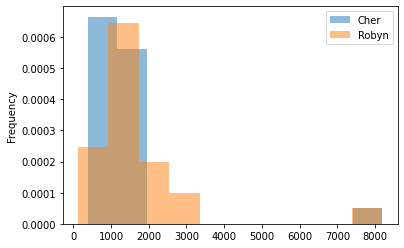

In [40]:
cher_lyrics_count = pd.DataFrame(columns=['Song Name', 'Count'])

for k,v in cher_songs_complete.items():
    cher_lyrics_count = cher_lyrics_count.append({'Song Name': k, 'Count': len(v)}, ignore_index = True)
    
    
robyn_lyrics_count = pd.DataFrame(columns=['Song Name', 'Count'])

for k,v in robyn_songs_complete.items():
    robyn_lyrics_count = robyn_lyrics_count.append({'Song Name': k, 'Count': len(v)}, ignore_index = True)

    
cher_lyrics_count['Artist'] = "Cher"
robyn_lyrics_count['Artist'] = 'Robyn'

lyrics_count = pd.concat([cher_lyrics_count, robyn_lyrics_count], axis=0)

lyrics_count.groupby('Artist')['Count'].plot(kind="hist",density=True,alpha=0.5,legend=True)